In [79]:
# Import packages, the Y-matrix for the dataset and Functions.py
import numpy as np
import matplotlib.pyplot as plt
%run 1.Karate_data_import.ipynb
import sys
sys.path.append('../') 
from Functions import *
%store -r points

In [80]:
# Adding stopping criteria
alpha = 2
prev_grad = 200 
grad = 0
k = 0
n = 10000000000
MLL = np.zeros(n) # Define the MLL
grad_sum = np.zeros(n) # Define the gradient sum

while abs(prev_grad - grad) > 0.00001: # stopping criteria
        print(prev_grad - grad)
        prev_grad = grad
        for i in range(1,num_samples+1): # Run over number of num_samples
                grad_now = Gradient_function_fast(i,dim,Y,points,alpha)
                grad_sum[k] += np.sum((grad_now)**2)
                points[i] += LR(k*10)*grad_now # Use Gradient_function and take step=0.1*grad
        grad = grad_sum[k]
        MLL[k] = Loss_function_fast(points,Y,alpha) # Calcualte the probability using Loss_function
        k += 1

200
-1387.9770201653084
940.73478017612
4.7571749140230395
-619.9169381594954
-472.2137172658606
-180.6853950817108
448.89488751393947
608.0853052668083
392.8510086720817
200.90046717972143
47.2979132736278
9.634557934726098
1.0937315160616468
0.45534299783616117
0.370297425057589
0.3243894660108797
0.28140603890773086
0.24296912549391436
0.20946569097167256
0.18071431284674144
0.15624311668599145
0.1354830371397755
0.117872604536851
0.1029050856905207
0.09014387866949924
0.07922228871958525
0.06983659944861431
0.0617370042344505
0.054718560933475935
0.04861307685373584
0.0432822058464275
0.038611748204445906
0.03450702382491766
0.03088915292005412
0.027692081188161133
0.024860204803539343
0.022346473601433825
0.020110873264127083
0.018119207080515398
0.016342114382214223
0.014754276172742387
0.013333769148598407
0.012061537722941829
0.010920960239848121
0.009897490690866206
0.00897836123003426
0.008152333882429197
0.007409492253084515
0.006741065925284673
0.006139281708113842
0.005597

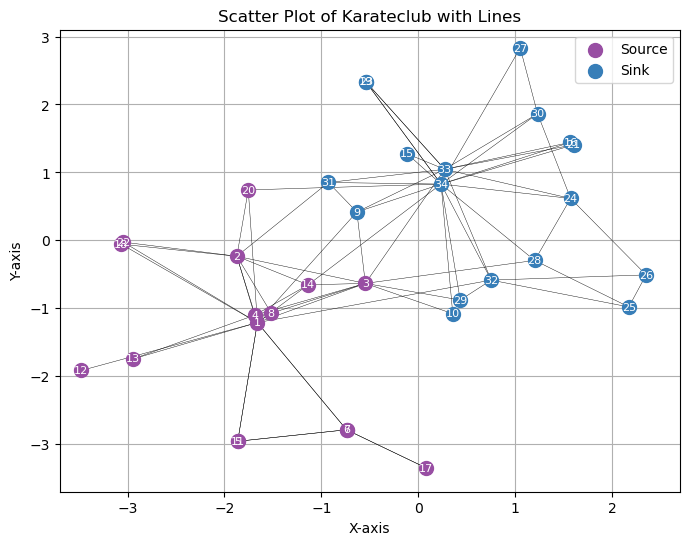

In [98]:
source = np.array([1,2,3,4,5,6,7,8,11,12,13,14,17,18,20,22])
sink = np.array([9,10,15,16,19,21,23,24,25,26,27,28,29,30,31,32,33,34])

# Generating some sample data for points
plt.figure(figsize=(8, 6))

for m in range(len(Y)): 
    if Y[m][0] == 1: # Check if there is a connection between Y[m][1] and Y[m][2]
        point1 = points[Y[m][1]]
        point2 = points[Y[m][2]]
        plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color='black', linewidth=0.3) # Ad a line between Y[m][1] and Y[m][2]

# Extract the points and plot them, coloring based on source and sink
x_source = [points[i][0] for i in source]
y_source = [points[i][1] for i in source]
plt.scatter(x_source, y_source, color='#984ea3', label='Source', s = 100, zorder=2)

x_sink = [points[i][0] for i in sink]
y_sink = [points[i][1] for i in sink]
plt.scatter(x_sink, y_sink, color='#377eb8', label='Sink', s = 100, zorder=2)

# Add point numbers inside vertices
for i, point in points.items():
    plt.text(point[0], point[1], str(i), color='white', fontsize=8, ha='center', va='center')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(-3.7,  2.7)
plt.ylim(-3.7,  3.1)
plt.title('Scatter Plot of Karateclub with Lines')
plt.grid(True)
plt.legend()
plt.show()


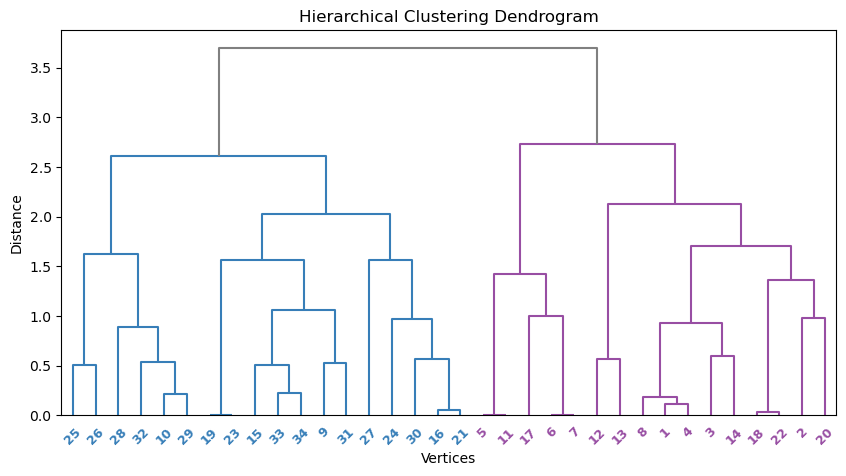

In [92]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import set_link_color_palette

source = np.array([1,2,3,4,5,6,7,8,11,12,13,14,17,18,20,22])
sink = np.array([9,10,15,16,19,21,23,24,25,26,27,28,29,30,31,32,33,34])

# Calculate pairwise distances
distances = pdist(list(points.values()))

# Perform hierarchical clustering
Z = linkage(distances, method='average')

# Set custom color palette
set_link_color_palette(['#377eb8', '#984ea3', '#4daf4a', '#e41a1c'])

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendro = dendrogram(Z, labels=list(points.keys()), above_threshold_color='grey', color_threshold=3)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Vertices')
plt.ylabel('Distance')

# Customize tick labels on the x-axis
plt.xticks(fontsize=9, fontweight='bold')

# Get the tick labels
ax = plt.gca()
xticks = ax.get_xmajorticklabels()

# Color the tick labels
for label in xticks:
    point_number = int(label.get_text())
    if point_number in source:
        label.set_color('#984ea3')  # Color for source
    elif point_number in sink:
        label.set_color('#377eb8')  # Color for sink

plt.show()